<a href="https://colab.research.google.com/github/kimhwijin/HandsOnMachineLearing/blob/main/Sequential_Using_CNN_RNN_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib as mpl

np.random.seed(42)
tf.random.set_seed(42)

# Generate_Sample_Series

In [51]:
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offset1, offset2 = np.random.rand(4, batch_size, 1)
    time = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offset1) * (freq1 * 10 + 10))
    series += 0.2 * np.sin((time - offset2) * (freq2 * 20 + 20))
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)
    return series[..., np.newaxis].astype(np.float32)


def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$", legend=True):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bo", label="Target")
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "rx", markersize=10, label="Prediction")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
    if legend and (y or y_pred):
        plt.legend(fontsize=14, loc="upper left")

def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)

(7000, 50, 1) (7000, 1)


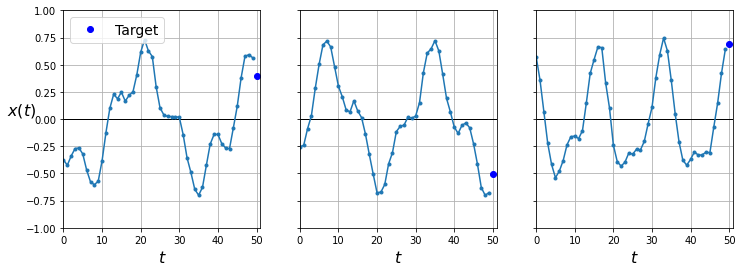

In [22]:
n_steps = 50
series = generate_time_series(10000, n_steps+1)
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
print(X_train.shape, y_train.shape)

fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None),
                legend=(col == 0))
plt.show()

# BaseLine_Performance

In [23]:
#naive forecasting
y_pred = X_valid[:, -1]
print(np.mean(keras.losses.mean_squared_error(y_valid, y_pred)))

#완전 연결 신경망
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])
model.compile(loss='mse', optimizer="adam")
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

0.020211367
Epoch 1/20
219/219 [==============================] - 1s 2ms/step - loss: 0.1001 - val_loss: 0.0545
Epoch 2/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0379 - val_loss: 0.0266
Epoch 3/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0202 - val_loss: 0.0157
Epoch 4/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0131 - val_loss: 0.0116
Epoch 5/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0103 - val_loss: 0.0098
Epoch 6/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0089 - val_loss: 0.0087
Epoch 7/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.0079
Epoch 8/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0071
Epoch 9/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0066 - val_loss: 0.0066
Epoch 10/20
219/219 [==============================] - 0s 2ms/step - loss: 0.0061 - val_

32/32 [==============================] - 0s 1ms/step - loss: 0.0042


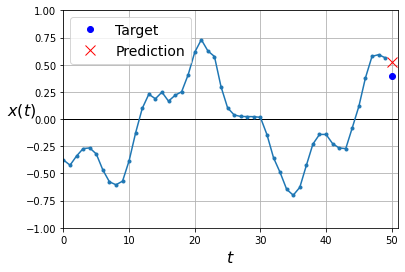

In [24]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

# Simple_RNN_Implement

In [25]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1])
])
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss='mse', optimizer=optimizer)
model.summary()
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_10 (SimpleRNN)   (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
219/219 [==============================] - 3s 9ms/step - loss: 0.0313 - val_loss: 0.0127
Epoch 2/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0119 - val_loss: 0.0112
Epoch 3/20
219/219 [==============================] - 2s 9ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 4/20
219/219 [==============================] - 2s 7ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 5/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0114 - val_loss: 0.0109
Epoch 6/20
219/219 [==============================] - 2s 8ms/step - loss: 0.0114 - val_l

32/32 [==============================] - 0s 3ms/step - loss: 0.0113


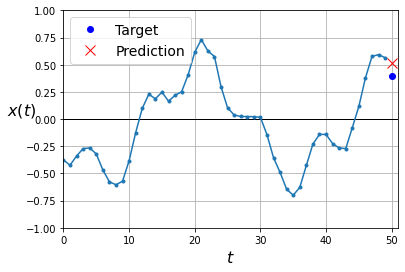

In [26]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

# Deep_RNN

In [27]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1)
])

model.compile(loss="mse", optimizer="adam")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
219/219 [==============================] - 8s 28ms/step - loss: 0.0175 - val_loss: 0.0051
Epoch 2/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0042 - val_loss: 0.0034
Epoch 3/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 4/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 5/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0031 - val_loss: 0.0030
Epoch 6/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0030 - val_loss: 0.0029
Epoch 7/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0029 - val_loss: 0.0031
Epoch 8/20
219/219 [==============================] - 6s 26ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/20
219/219 [==============================] - 6s 28ms/step - loss: 0.0029 - val_loss: 0.0027
Epoch 10/20
219/219 [==============================] - 6s 27ms/step - loss: 0.0028 - val_lo

In [28]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_11 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 simple_rnn_12 (SimpleRNN)   (None, None, 20)          820       
                                                                 
 simple_rnn_13 (SimpleRNN)   (None, 1)                 22        
                                                                 
Total params: 1,282
Trainable params: 1,282
Non-trainable params: 0
_________________________________________________________________


32/32 [==============================] - 0s 8ms/step - loss: 0.0027


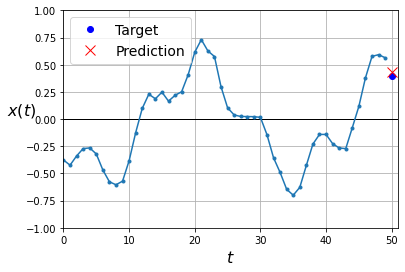

In [29]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

In [30]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer="adam")
model.summary()
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_14 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 20)                820       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,281
Trainable params: 1,281
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
219/219 [==============================] - 6s 20ms/step - loss: 0.0869 - val_loss: 0.0084
Epoch 2/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0059 - val_loss: 0.0045
Epoch 3/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0041 - val_loss: 0.0036
Epoch 4/20
21

32/32 [==============================] - 0s 6ms/step - loss: 0.0028


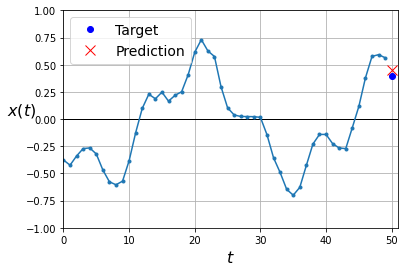

In [31]:
model.evaluate(X_test, y_test)
y_pred = model.predict(X_valid)
plot_series(X_valid[0, :, 0], y_valid[0, 0], y_pred[0, 0])
plt.show()

# Multi_Forecasting

In [32]:
np.random.seed(43) # 42는 훈련 세트에 있는 첫 번째 시리즈를 반환하기 때문에 다른 값으로 지정합니다
#순서대로 10개 예측
series = generate_time_series(1, n_steps + 10)
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)

Y_pred = X[:, n_steps:]

print(Y_pred.shape)

(1, 10, 1)


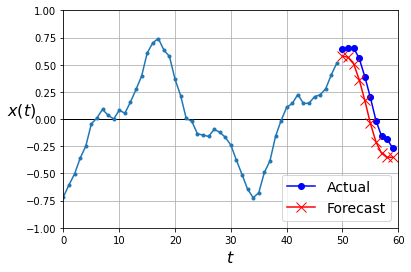

In [33]:
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "bo-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "rx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)

plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [34]:
#한번에 10개 예측
series = generate_time_series(10000, n_steps + 10)
X_train, y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, y_test = series[9000:, n_steps], series[9000:, -10:, 0]
print(X_train.shape, y_train.shape)

(7000, 50, 1) (7000, 10)


In [35]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10)
])
model.compile(loss='mse', optimizer='adam')
history = model.fit(X_train, y_train, epochs=20, validation_data=[X_valid, y_valid])

Epoch 1/20
219/219 [==============================] - 6s 21ms/step - loss: 0.0600 - val_loss: 0.0298
Epoch 2/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0205 - val_loss: 0.0256
Epoch 3/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0154 - val_loss: 0.0127
Epoch 4/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0128 - val_loss: 0.0116
Epoch 5/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0119 - val_loss: 0.0108
Epoch 6/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 7/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0109 - val_loss: 0.0101
Epoch 8/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0106 - val_loss: 0.0100
Epoch 9/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0100 - val_loss: 0.0096
Epoch 10/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0097 - val_lo

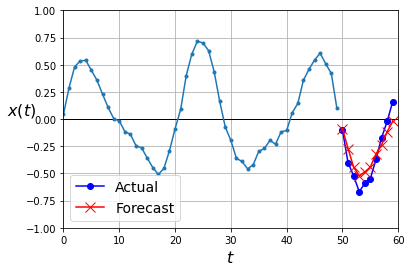

0.011563397

In [36]:
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
Y_pred = model.predict(X_new)[..., np.newaxis]
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

np.mean(keras.metrics.mean_squared_error(Y_new, Y_pred))

In [37]:
#10개 동시에 예측 시퀀스-투-시퀀스 모델

n_steps = 50
series = generate_time_series(10000, n_steps + 10)
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test = series[9000:, :n_steps]
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    #각 타깃은 각 타임 스텝의 이후 10개의 타깃 벡터값
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test = Y[9000:]

In [38]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    #시퀀스를 출력한다.
    keras.layers.SimpleRNN(20, return_sequences=True),
    #모든 타임 스텝에서 출력을 적용하기 위해
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

#예측한 10개중 가장 마지막의 mse를 계산한다.
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])

model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 6s 21ms/step - loss: 0.0502 - last_time_step_mse: 0.0397 - val_loss: 0.0416 - val_last_time_step_mse: 0.0312
Epoch 2/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0401 - last_time_step_mse: 0.0300 - val_loss: 0.0378 - val_last_time_step_mse: 0.0279
Epoch 3/20
219/219 [==============================] - 4s 20ms/step - loss: 0.0330 - last_time_step_mse: 0.0224 - val_loss: 0.0315 - val_last_time_step_mse: 0.0224
Epoch 4/20
219/219 [==============================] - 4s 19ms/step - loss: 0.0294 - last_time_step_mse: 0.0182 - val_loss: 0.0271 - val_last_time_step_mse: 0.0156
Epoch 5/20
219/219 [==============================] - 4s 18ms/step - loss: 0.0268 - last_time_step_mse: 0.0149 - val_loss: 0.0289 - val_last_time_step_mse: 0.0183
Epoch 6/20
219/219 [==============================] - 5s 21ms/step - loss: 0.0241 - last_time_step_mse: 0.0114 - val_loss: 0.0209 - val_last_time_step_mse: 0.0078
Epoch 7/20
219/219 [==

# Layer_Normalization_Dropout

In [43]:
class LayerNormalization_SimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation='tanh', **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units, activation=None)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)

    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(input)[0]
            dtype = inputs.dtype
        return [tf.zeros(shape=[batch_size, self.state_size], dtype=dtype)]
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        norm_outputs = self.activation(self.layer_norm(outputs))
        return norm_outputs, [norm_outputs]

model = keras.models.Sequential([
    keras.layers.RNN(LayerNormalization_SimpleRNNCell(20), return_sequences=True,
                     input_shape=[None, 1]),
    keras.layers.RNN(LayerNormalization_SimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))



Epoch 1/20
219/219 [==============================] - 12s 43ms/step - loss: 0.1519 - last_time_step_mse: 0.1489 - val_loss: 0.0625 - val_last_time_step_mse: 0.0487
Epoch 2/20
219/219 [==============================] - 9s 39ms/step - loss: 0.0557 - last_time_step_mse: 0.0435 - val_loss: 0.0503 - val_last_time_step_mse: 0.0379
Epoch 3/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0472 - last_time_step_mse: 0.0356 - val_loss: 0.0439 - val_last_time_step_mse: 0.0313
Epoch 4/20
219/219 [==============================] - 9s 39ms/step - loss: 0.0420 - last_time_step_mse: 0.0303 - val_loss: 0.0394 - val_last_time_step_mse: 0.0275
Epoch 5/20
219/219 [==============================] - 9s 39ms/step - loss: 0.0387 - last_time_step_mse: 0.0259 - val_loss: 0.0352 - val_last_time_step_mse: 0.0215
Epoch 6/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0347 - last_time_step_mse: 0.0204 - val_loss: 0.0331 - val_last_time_step_mse: 0.0187
Epoch 7/20
219/219 [=

In [45]:
class LayerNormalization_Dropout_SimpleRNNCell(keras.layers.Layer):
    def __init__(self, units, activation='tanh', **kwargs):
        super().__init__(**kwargs)
        self.state_size = units
        self.output_size = units
        self.simple_rnn_cell = keras.layers.SimpleRNNCell(units, activation=None)
        self.recurrent_dropout = keras.layers.Dropout(0.5)
        self.layer_norm = keras.layers.LayerNormalization()
        self.activation = keras.activations.get(activation)

    def get_initial_state(self, inputs=None, batch_size=None, dtype=None):
        if inputs is not None:
            batch_size = tf.shape(input)[0]
            dtype = inputs.dtype
        return [tf.zeros(shape=[batch_size, self.state_size], dtype=dtype)]
    def call(self, inputs, states):
        outputs, new_states = self.simple_rnn_cell(inputs, states)
        dropout_outputs = self.recurrent_dropout(outputs)    
        norm_outputs = self.activation(self.layer_norm(dropout_outputs))
        return norm_outputs, [norm_outputs]


model = keras.models.Sequential([
    keras.layers.RNN(LayerNormalization_SimpleRNNCell(20), return_sequences=True, input_shape=[None, 1]),
    keras.layers.RNN(LayerNormalization_SimpleRNNCell(20), return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 11s 41ms/step - loss: 0.1920 - last_time_step_mse: 0.1713 - val_loss: 0.0855 - val_last_time_step_mse: 0.0702
Epoch 2/20
219/219 [==============================] - 9s 40ms/step - loss: 0.0685 - last_time_step_mse: 0.0551 - val_loss: 0.0599 - val_last_time_step_mse: 0.0475
Epoch 3/20
219/219 [==============================] - 9s 39ms/step - loss: 0.0565 - last_time_step_mse: 0.0459 - val_loss: 0.0528 - val_last_time_step_mse: 0.0418
Epoch 4/20
219/219 [==============================] - 9s 39ms/step - loss: 0.0504 - last_time_step_mse: 0.0414 - val_loss: 0.0474 - val_last_time_step_mse: 0.0384
Epoch 5/20
219/219 [==============================] - 9s 39ms/step - loss: 0.0461 - last_time_step_mse: 0.0376 - val_loss: 0.0438 - val_last_time_step_mse: 0.0349
Epoch 6/20
219/219 [==============================] - 8s 38ms/step - loss: 0.0431 - last_time_step_mse: 0.0353 - val_loss: 0.0414 - val_last_time_step_mse: 0.0326
Epoch 7/20
219/219 [=

# LSTM


In [46]:
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 12s 40ms/step - loss: 0.0763 - last_time_step_mse: 0.0624 - val_loss: 0.0526 - val_last_time_step_mse: 0.0323
Epoch 2/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0471 - last_time_step_mse: 0.0267 - val_loss: 0.0415 - val_last_time_step_mse: 0.0210
Epoch 3/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0383 - last_time_step_mse: 0.0186 - val_loss: 0.0353 - val_last_time_step_mse: 0.0160
Epoch 4/20
219/219 [==============================] - 8s 35ms/step - loss: 0.0343 - last_time_step_mse: 0.0157 - val_loss: 0.0325 - val_last_time_step_mse: 0.0138
Epoch 5/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0322 - last_time_step_mse: 0.0141 - val_loss: 0.0309 - val_last_time_step_mse: 0.0129
Epoch 6/20
219/219 [==============================] - 8s 36ms/step - loss: 0.0305 - last_time_step_mse: 0.0129 - val_loss: 0.0293 - val_last_time_step_mse: 0.0115
Epoch 7/20
219/219 [=

In [49]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
])
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_21 (SimpleRNN)   (None, None, 20)          440       
                                                                 
 lstm_4 (LSTM)               (None, None, 20)          3280      
                                                                 
Total params: 3,720
Trainable params: 3,720
Non-trainable params: 0
_________________________________________________________________


# GRU

In [50]:
model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 13s 45ms/step - loss: 0.0782 - last_time_step_mse: 0.0712 - val_loss: 0.0536 - val_last_time_step_mse: 0.0428
Epoch 2/20
219/219 [==============================] - 9s 42ms/step - loss: 0.0488 - last_time_step_mse: 0.0383 - val_loss: 0.0448 - val_last_time_step_mse: 0.0333
Epoch 3/20
219/219 [==============================] - 9s 43ms/step - loss: 0.0435 - last_time_step_mse: 0.0328 - val_loss: 0.0415 - val_last_time_step_mse: 0.0302
Epoch 4/20
219/219 [==============================] - 9s 42ms/step - loss: 0.0402 - last_time_step_mse: 0.0295 - val_loss: 0.0381 - val_last_time_step_mse: 0.0264
Epoch 5/20
219/219 [==============================] - 9s 42ms/step - loss: 0.0359 - last_time_step_mse: 0.0240 - val_loss: 0.0325 - val_last_time_step_mse: 0.0181
Epoch 6/20
219/219 [==============================] - 9s 42ms/step - loss: 0.0318 - last_time_step_mse: 0.0179 - val_loss: 0.0297 - val_last_time_step_mse: 0.0153
Epoch 7/20
219/219 [=

63/63 [==============================] - 1s 8ms/step - loss: 0.0203 - last_time_step_mse: 0.0057


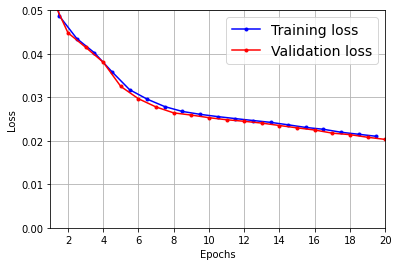

In [52]:
model.evaluate(X_valid, Y_valid)
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()


np.random.seed(43)
series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

# 1D_Conv

In [59]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                        input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
model.summary()
history = model.fit(X_train, Y_train[:, 3::2], epochs=20,
                    validation_data=(X_valid, Y_valid[:, 3::2]))

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_5 (Conv1D)           (None, None, 20)          100       
                                                                 
 gru_8 (GRU)                 (None, None, 20)          2520      
                                                                 
 gru_9 (GRU)                 (None, None, 20)          2520      
                                                                 
 time_distributed_9 (TimeDis  (None, None, 10)         210       
 tributed)                                                       
                                                                 
Total params: 5,350
Trainable params: 5,350
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
219/219 [==============================] - 10s 28ms/step - loss: 0.0692 - last_time_step_mse: 0.0622 - val

In [63]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=4, strides=2, padding="valid",
                        input_shape=[50, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="same",),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
model.summary()

Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_10 (Conv1D)          (None, 24, 20)            100       
                                                                 
 gru_14 (GRU)                (None, 24, 20)            2520      
                                                                 
 conv1d_11 (Conv1D)          (None, 24, 20)            1220      
                                                                 
 gru_15 (GRU)                (None, 24, 20)            2520      
                                                                 
 time_distributed_12 (TimeDi  (None, 24, 10)           210       
 stributed)                                                      
                                                                 
Total params: 6,570
Trainable params: 6,570
Non-trainable params: 0
___________________________________________________

# WaveNet

In [64]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for rate in (1, 2, 4, 8) * 2:
    model.add(keras.layers.Conv1D(filters=20, kernel_size=2, padding='causal', activation='relu', dilation_rate=rate))
model.add(keras.layers.Conv1D(filters=10, kernel_size=1))
model.compile(loss='mse', optimizer='adam', metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20, validation_data=[X_valid, Y_valid])

Epoch 1/20
219/219 [==============================] - 4s 14ms/step - loss: 0.0665 - last_time_step_mse: 0.0546 - val_loss: 0.0358 - val_last_time_step_mse: 0.0218
Epoch 2/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0325 - last_time_step_mse: 0.0195 - val_loss: 0.0296 - val_last_time_step_mse: 0.0165
Epoch 3/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0287 - last_time_step_mse: 0.0160 - val_loss: 0.0279 - val_last_time_step_mse: 0.0149
Epoch 4/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0267 - last_time_step_mse: 0.0141 - val_loss: 0.0265 - val_last_time_step_mse: 0.0136
Epoch 5/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0256 - last_time_step_mse: 0.0132 - val_loss: 0.0246 - val_last_time_step_mse: 0.0119
Epoch 6/20
219/219 [==============================] - 3s 13ms/step - loss: 0.0247 - last_time_step_mse: 0.0124 - val_loss: 0.0246 - val_last_time_step_mse: 0.0127
Epoch 7/20
219/219 [==

In [65]:
class GatedActivationUnit(keras.layers.Layer):
    def __init__(self, activation="tanh", **kwargs):
        super().__init__(**kwargs)
        self.activation = keras.activations.get(activation)
    def call(self, inputs):
        n_filters = inputs.shape[-1] // 2
        linear_output = self.activation(inputs[..., :n_filters])
        gate = keras.activations.sigmoid(inputs[..., n_filters:])
        return self.activation(linear_output) * gate

#입력이랑, Conv1D를 수행한거랑 스킵연결 만들어서 반환해줌
def wavenet_residual_block(inputs, n_filters, dilation_rate):
    z = keras.layers.Conv1D(2 * n_filters, kernel_size=2, padding="causal",
                            dilation_rate=dilation_rate)(inputs)
    z = GatedActivationUnit()(z)
    z = keras.layers.Conv1D(n_filters, kernel_size=1)(z)
    return keras.layers.Add()([z, inputs]), z

In [69]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

#블럭당 층 개수
n_layers_per_block = 3 # 10 in the paper
#블럭 개수
n_blocks = 1 # 3 in the paper
#필터 개수
n_filters = 32 # 128 in the paper
#예측 타임 스텝 개수
n_outputs = 10 # 256 in the paper

#단변량 시계열
inputs = keras.layers.Input(shape=[None, 1])
#첫 합성곱
z = keras.layers.Conv1D(n_filters, kernel_size=2, padding="causal")(inputs)
skip_to_last = []

#1, 2, 4 합성곱 생성
for dilation_rate in [2**i for i in range(n_layers_per_block)] * n_blocks:
    #Conv1D, Activation, kernel_size=1 인 Conv1D , skip 연결 반환
    z, skip = wavenet_residual_block(z, n_filters, dilation_rate)
    skip_to_last.append(skip)

#모든 스킵연결하고 연결
z = keras.activations.relu(keras.layers.Add()(skip_to_last))
z = keras.layers.Conv1D(n_filters, kernel_size=1, activation="relu")(z)
#소프트 맥스로 확률 출력 이모델은 아마도 소프트 투 벡터로 어떤 확률을 출력하는 모델인듯?
Y_proba = keras.layers.Conv1D(n_outputs, kernel_size=1, activation="softmax")(z)

model = keras.models.Model(inputs=[inputs], outputs=[Y_proba])

In [67]:
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
219/219 [==============================] - 6s 22ms/step - loss: 0.1299 - last_time_step_mse: 0.1254 - val_loss: 0.1222 - val_last_time_step_mse: 0.1160
Epoch 2/20
219/219 [==============================] - 5s 21ms/step - loss: 0.1221 - last_time_step_mse: 0.1169 - val_loss: 0.1209 - val_last_time_step_mse: 0.1147
Epoch 3/20
219/219 [==============================] - 5s 21ms/step - loss: 0.1215 - last_time_step_mse: 0.1163 - val_loss: 0.1206 - val_last_time_step_mse: 0.1144
Epoch 4/20
219/219 [==============================] - 5s 21ms/step - loss: 0.1212 - last_time_step_mse: 0.1160 - val_loss: 0.1204 - val_last_time_step_mse: 0.1143
Epoch 5/20
219/219 [==============================] - 4s 21ms/step - loss: 0.1210 - last_time_step_mse: 0.1158 - val_loss: 0.1203 - val_last_time_step_mse: 0.1143
Epoch 6/20
219/219 [==============================] - 5s 21ms/step - loss: 0.1208 - last_time_step_mse: 0.1157 - val_loss: 0.1200 - val_last_time_step_mse: 0.1140
Epoch 7/20
219/219 [==